# A quick recap of language models

A language model is a statistical model that assigns probabilities to words and sentences. Typically, we might be trying to guess the next word w in a sentence given all previous words, often referred to as the “history”.<br>
For example, given the history “For dinner I’m making __”, what’s the probability that the next word is “cement”? What’s the probability that the next word is “fajitas”?<br>
Hopefully, P(fajitas|For dinner I’m making) > P(cement|For dinner I’m making).<br>
We are also often interested in the probability that our model assigns to a full sentence W made of the sequence of words (w_1,w_2,…,w_N).

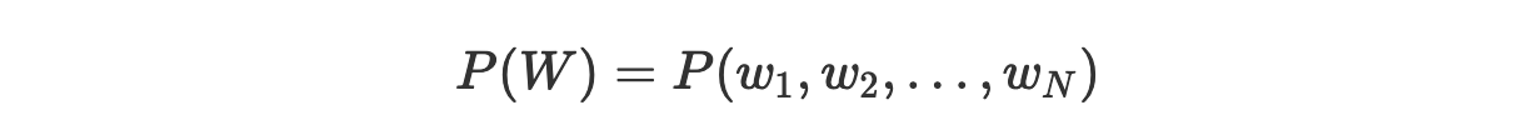

For example, we’d like a model to assign higher probabilities to sentences that are real and syntactically correct.<br>
A unigram model only works at the level of individual words. Given a sequence of words W, a unigram model would output the probability:

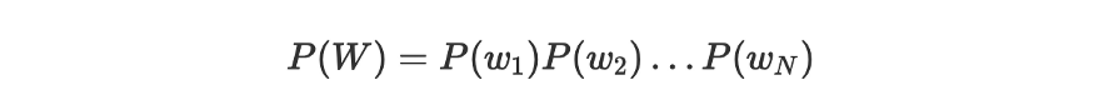

where the individual probabilities P(w_i) could for example be estimated based on the frequency of the words in the training corpus.<br>
An n-gram model, instead, looks at the previous (n-1) words to estimate the next one. For example, a trigram model would look at the previous 2 words, so that:

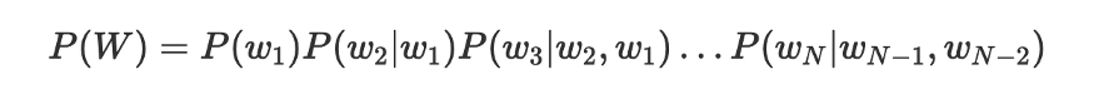

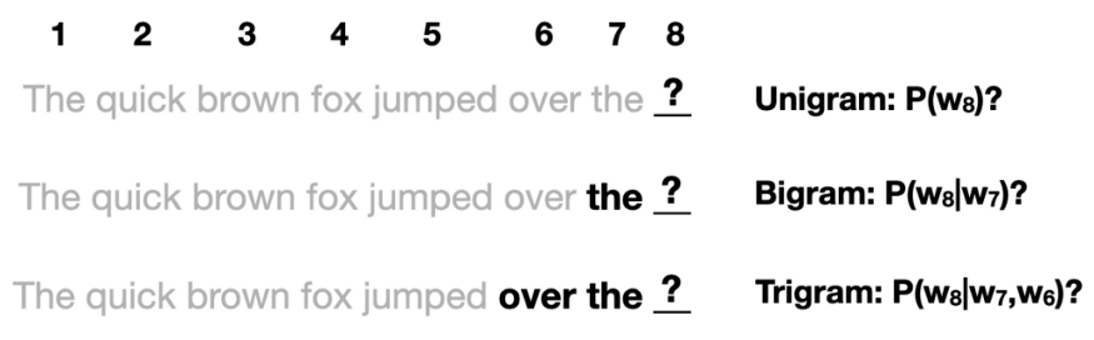

Language models can be embedded in more complex systems to aid in performing language tasks such as translation, classification, speech recognition, etc.

# Evaluating language models
Perplexity is an evaluation metric for language models. But why would we want to use it? Why can’t we just look at the loss/accuracy of our final system on the task we care about?

We can in fact use two different approaches to evaluate and compare language models:
- **Extrinsic evaluation**: This involves evaluating the models by employing them in an actual task (such as machine translation) and looking at their final loss/accuracy. This is the best option as it’s the only way to tangibly see how different models affect the task we’re interested in. However, it can be computationally expensive and slow as it requires training a full system.
- **Intrinsic evaluation**: This involves finding some metric to evaluate the language model itself, not taking into account the specific tasks it’s going to be used for. While intrinsic evaluation is not as “good” as extrinsic evaluation as a final metric, it’s a useful way of quickly comparing models. Perplexity is an intrinsic evaluation method.


# Perplexity as the normalised inverse probability of the test set

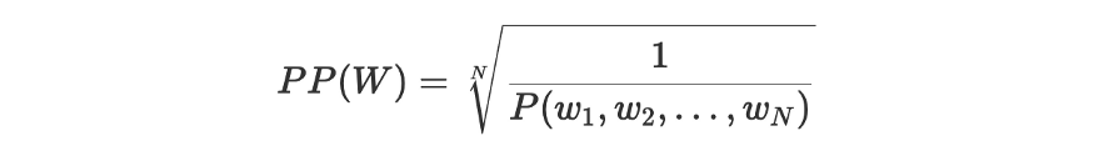

This is probably the most frequently seen definition of perplexity. In this section we’ll see why it makes sense.<br>

## Probability of the test set
First of all, what makes a good language model? As mentioned earlier, we want our model to assign high probabilities to sentences that are real and syntactically correct, and low probabilities to fake, incorrect, or highly infrequent sentences. Assuming our dataset is made of sentences that are in fact real and correct, this means that the best model will be the one that assigns the highest probability to the test set.<br> 

Intuitively, if a model assigns a high probability to the test set, it means that it is not surprised to see it (it’s not perplexed by it), which means that it has a good understanding of how the language works.

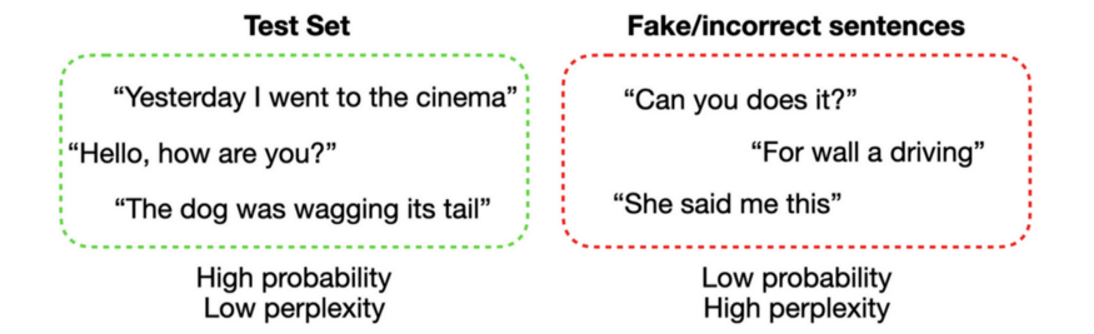

## Normalising
However, it’s worth noting that datasets can have varying numbers of sentences, and sentences can have varying numbers of words. Clearly, adding more sentences introduces more uncertainty, so other things being equal a larger test set is likely to have a lower probability than a smaller one. Ideally, we’d like to have a metric that is independent of the size of the dataset. We could obtain this by normalising the probability of the test set by the total number of words, which would give us a per-word measure.<br>
How do we do this? If what we wanted to normalise was the sum of some terms, we could just divide it by the number of words to get a per-word measure. But the probability of a sequence of words is given by a product.<br>
For example, let’s take a unigram model:

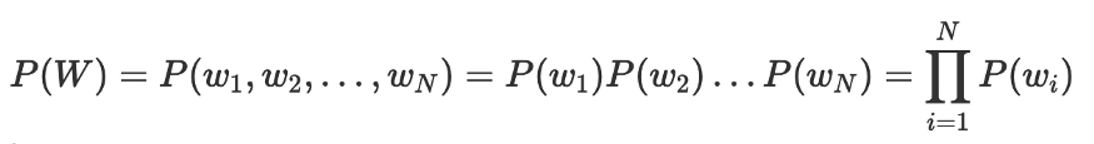

How do we normalise this probability? It’s easier to do it by looking at the log probability, which turns the product into a sum:

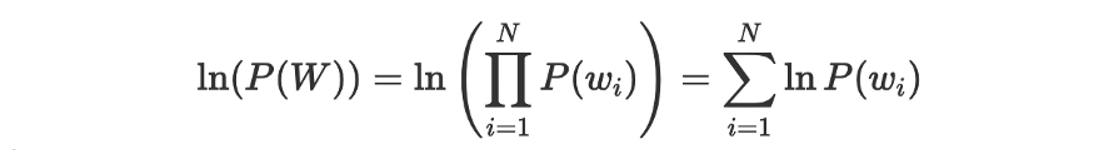

We can now normalise this by dividing by N to obtain the per-word log probability:

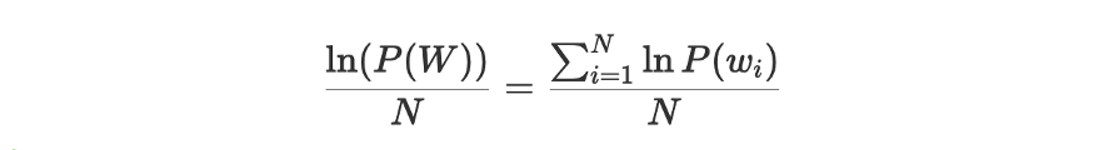

… and then remove the log by exponentiations:

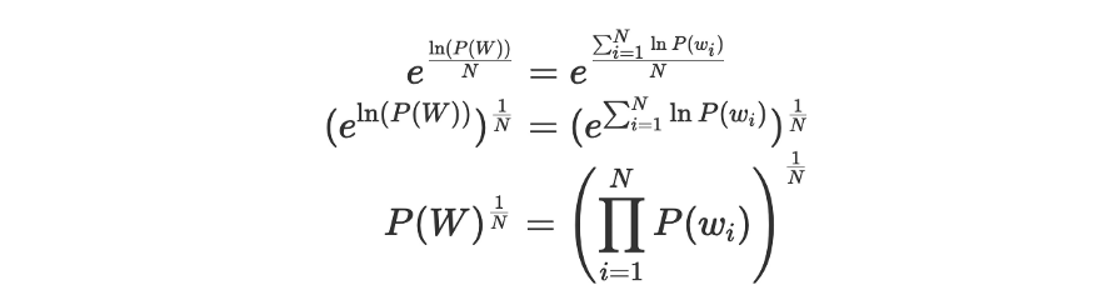

We can see that we’ve obtained normalisation by taking the N-th root.

## Bringing it all together

Now going back to our original equation for perplexity, we can see that we can interpret it as the inverse probability of the test set,
normalised by the number of words in the test set:

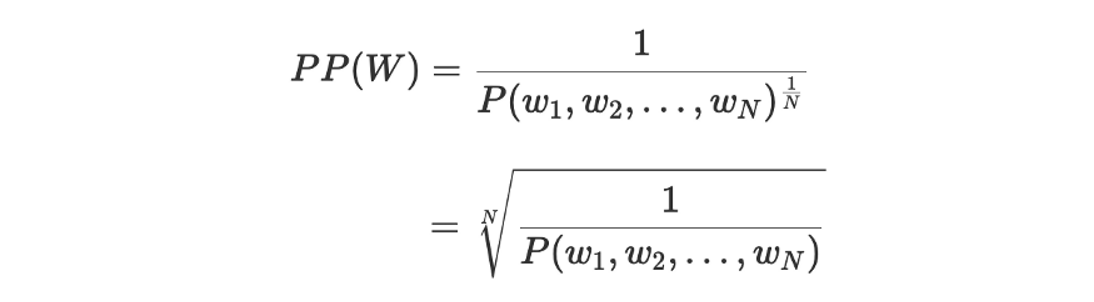

Note:
- Since we’re taking the inverse probability, a lower perplexity indicates a better model
- In this case W is the test set. It contains the sequence of words of all sentences one after the other, including the start-of-sentence and end-of-sentence tokens, <SOS> and <EOS>.

For example, a test set with two sentences would look like this:<br>
W = (<SOS>, This, is, the, first, sentence, . ,<EOS>,<SOS>,This, is, the, second, one, . ,<EOS>)<br>
N is the count of all tokens in our test set, including SOS/ EOS and punctuation. In the example above N = 16.<br>
If we want, we can also calculate the perplexity of a single sentence, in which case W would simply be that one sentence.

# Perplexity as the exponential of the cross-entropy

Note: if you need a refresher on entropy I heartily recommend this document by Sriram Vajapeyam.<br>
Perplexity can also be defined as the exponential of the cross-entropy:

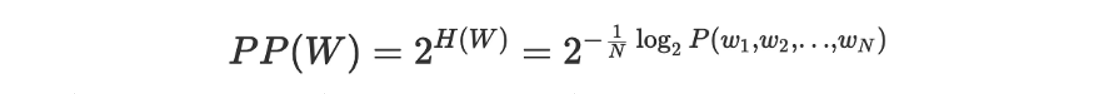

First of all, we can easily check that this is in fact equivalent to the previous definition:

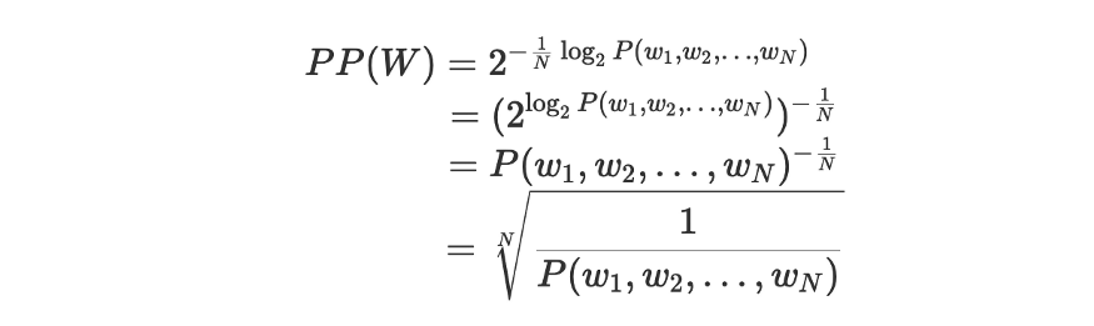

But how can we explain this definition based on the cross-entropy?

## Cross-entropy of a language model
We know that entropy can be interpreted as the average number of bits required to store the information in a variable, and it’s given by:

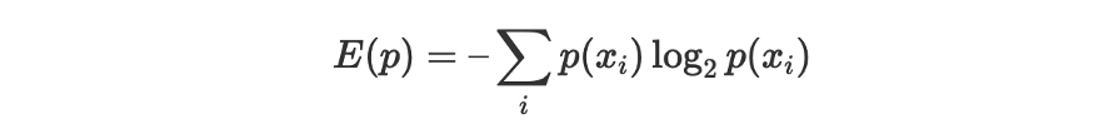

We also know that the cross-entropy is given by:

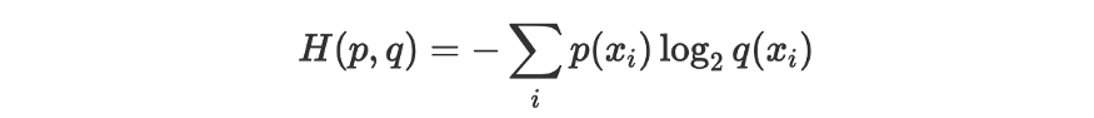

which can be interpreted as the average number of bits required to store the information in a variable, if instead of the real probability distribution p we’re using an estimated distribution q.<br>
In our case, p is the real distribution of our language, while q is the distribution estimated by our model on the training set. Clearly, we can’t know the real p, but given a long enough sequence of words W (so a large N), we can approximate the per-word cross-entropy using Shannon-McMillan-Breiman theorem (for more details I recommend [1] and [2]):

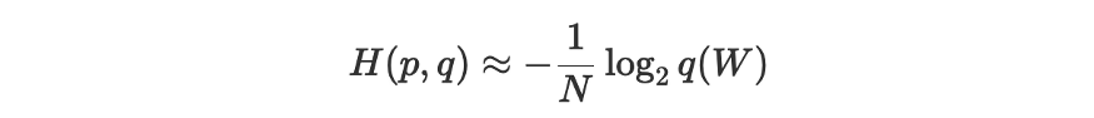

Let’s rewrite this to be consistent with the notation used in the previous section. Given a sequence of words W of length N and a trained language model P, we approximate the cross-entropy as:

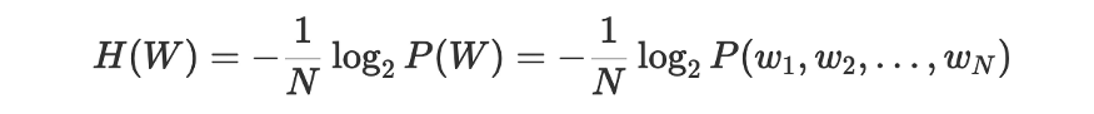

Let’s look again at our definition of perplexity:

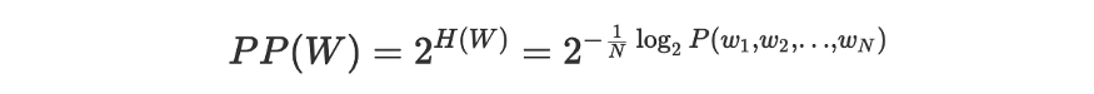

From what we know of cross-entropy we can say that H(W) is the average number of bits needed to encode each word. This means that the perplexity 2^H(W) is the average number of words that can be encoded using H(W) bits.<br>
How can we interpret this? We can look at perplexity as the weighted branching factor.<br>

## Weighted branching factor: rolling a die
So we’ve said:

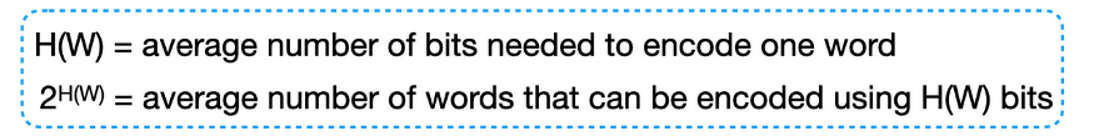

For example, if we find that H(W) = 2, it means that on average each word needs 2 bits to be encoded, and using 2 bits we can encode 2² = 4 words.

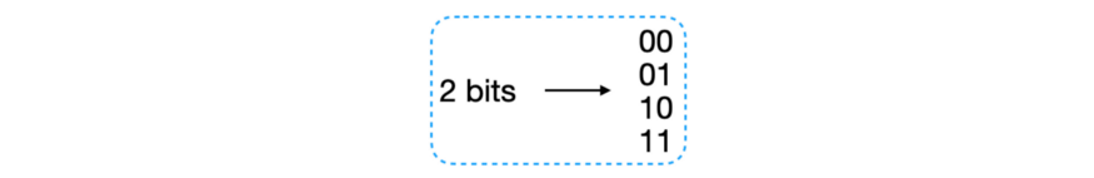

But what does this mean? For simplicity, let’s forget about language and words for a moment and imagine that our model is actually trying to predict the outcome of rolling a die. A regular die has 6 sides, so the branching factor of the die is 6. The branching factor simply indicates how many possible outcomes there are whenever we roll.

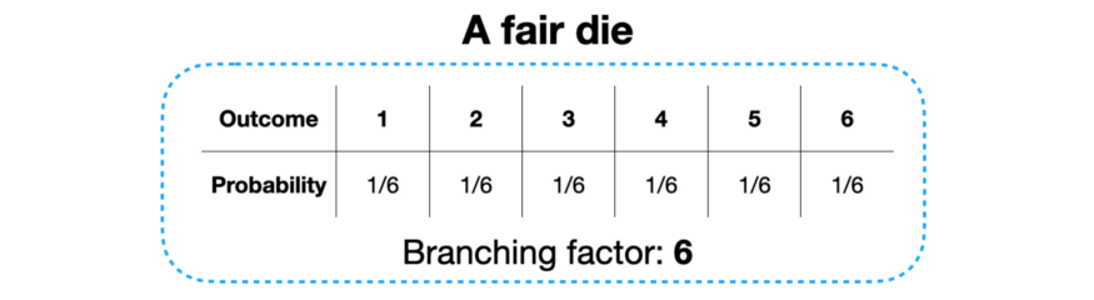

Let’s say we train our model on this fair die, and the model learns that each time we roll there is a 1/6 probability of getting any side. Then let’s say we create a test set by rolling the die 10 more times and we obtain the (highly unimaginative) sequence of outcomes T = {1, 2, 3, 4, 5, 6, 1, 2, 3, 4}. What’s the perplexity of our model on this test set?

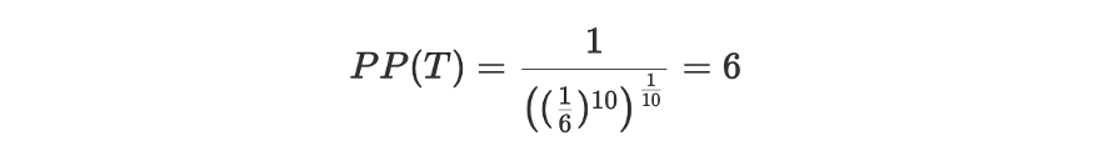

So the perplexity matches the branching factor.<br>
Let’s now imagine that we have an unfair die, which rolls a 6 with a probability of 7/12, and all the other sides with a probability of 1/12 each. We again train a model on a training set created with this unfair die so that it will learn these probabilities. We then create a new test set T by rolling the die 12 times: we get a 6 on 7 of the rolls, and other numbers on the remaining 5 rolls. What’s the perplexity now?

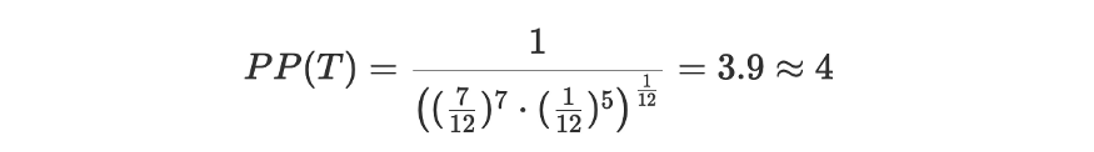

The perplexity is lower. This is because our model now knows that rolling a 6 is more probable than any other number, so it’s less “surprised” to see one, and since there are more 6s in the test set than other numbers, the overall “surprise” associated with the test set is lower. The branching factor is still 6, because all 6 numbers are still possible options at any roll. However, the weighted branching factor is now lower, due to one option being a lot more likely than the others. This is like saying that under these new conditions, at each roll our model is as uncertain of the outcome as if it had to pick between 4 different options, as opposed to 6 when all sides had equal probability.

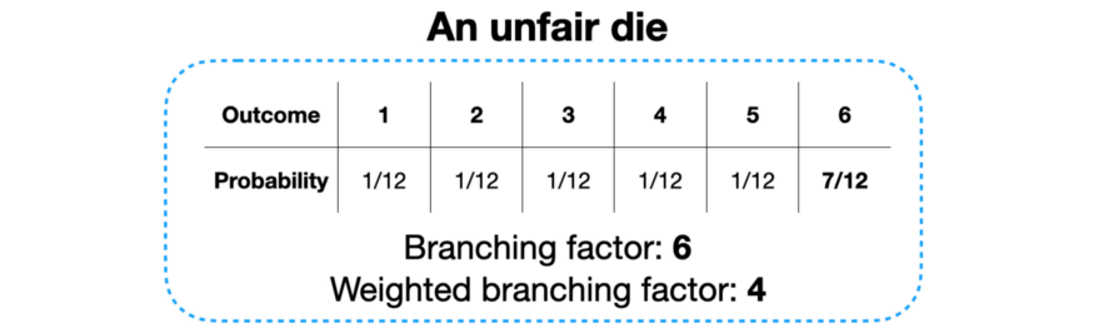

To clarify this further, let’s push it to the extreme. Let’s say we now have an unfair die that gives a 6 with 99% probability, and the other numbers with a probability of 1/500 each. We again train the model on this die and then create a test set with 100 rolls where we get a 6 99 times and another number once. The perplexity is now:

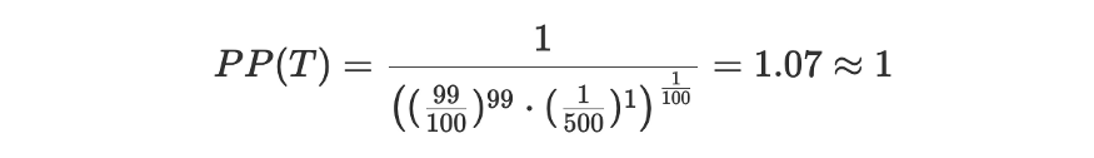

The branching factor is still 6 but the weighted branching factor is now 1, because at each roll the model is almost certain that it’s going to be a 6, and rightfully so. So while technically at each roll there are still 6 possible options, there is only 1 option that is a strong favourite.

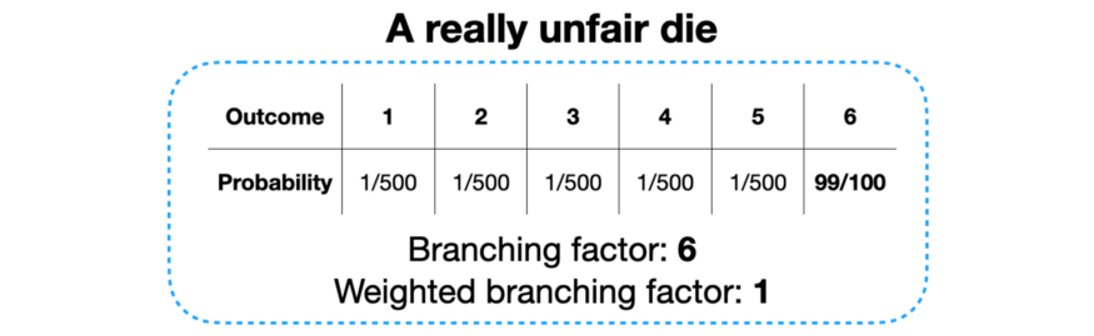

## Weighted branching factor: language models
Let’s tie this back to language models and cross-entropy.<br>
First of all, if we have a language model that’s trying to guess the next word, the branching factor is simply the number of words that are possible at each point, which is just the size of the vocabulary.<br>
We said earlier that perplexity in a language model is the average number of words that can be encoded using H(W) bits. We can now see that this simply represents the average branching factor of the model. As we said earlier, if we find a cross-entropy value of 2, this indicates a perplexity of 4, which is the “average number of words that can be encoded”, and that’s simply the average branching factor. All this means is that when trying to guess the next word, our model is as confused as if it had to pick between 4 different words.


# Summary
- Perplexity is a metric used to judge how good a language model is
- We can define perplexity as the inverse probability of the test set, normalised by the number of words:

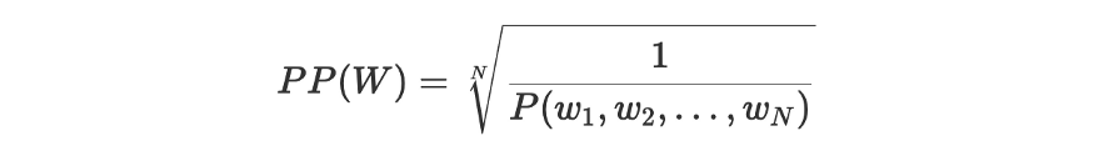

- We can alternatively define perplexity by using the cross-entropy, where the cross-entropy indicates the average number of bits needed to encode one word, and perplexity is the number of words that can be encoded with those bits:

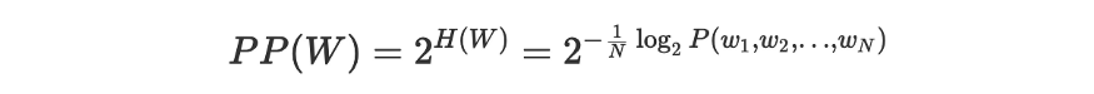

- We can interpret perplexity as the weighted branching factor. If we have a perplexity of 100, it means that whenever the model is trying to guess the next word it is as confused as if it had to pick between 100 words.